### Student Information
Name: Dongil "Jeff" Jang

Student ID: 108065429

GitHub ID: justdoit0430

Kaggle name: JEFF 

Kaggle private scoreboard snapshot: 

https://drive.google.com/file/d/1WV-HG4YOyzckp_z3NBVbu7t9b-QbZPrQ/view?usp=sharing

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [4]:
### Begin Assignment Here



In [19]:
#Please ignore this cell
{
    "tags": [
        "hide_input",
        "hide_output"
    ]
}

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)
    


Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [5]:
# Answer here

#using countvectorizer and then plot in the long tail bar chart 

from collections import Counter
import pandas as pd
import nltk
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
test_counts = count_vect.fit_transform(test_df.text)
train_counts


<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [6]:
#check out the safe and dataframe
test_df

,id,text,emotion,intensity
73,10930,@HomeSwapperteam Spent months arranging swap ...,anger,0.667
263,30892,Sioux Valley wins home competitive #cheer invi...,joy,0.583
155,21218,About 7 weeks till I can pick up my camera aga...,fear,0.396
112,21175,@soozclifford Sure have... Sydney are too toug...,fear,0.356
51,10908,"@reluctantnicko Don't ask, you don't get. Apol...",anger,0.427
...,...,...,...,...
317,40830,Folk Band 'Thistle Down' will be replaced by '...,sadness,0.271
327,40840,Rooney is 5 yards off the pace in a League Cup...,sadness,0.292
296,40809,"@DxfyingGrxvity - frustration, looking up at E...",sadness,0.479
107,21170,The Apocalypse has hit our gym and it's nothi...,fear,0.583


In [ ]:
#For the train data

from collections import Counter
import pandas as pd
import nltk
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

term_frequencies = []
for j in range(0,train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))
    

df_tf = pd.DataFrame(data = {'term' : count_vect.get_feature_names()[:900], 'frequency' : term_frequencies[:900]})
df_tf_sorted = df_tf.sort_values(by = 'frequency', ascending = False).reset_index(drop = True)
print(df_tf_sorted.head())


data = {"type":"bar", "x" : df_tf_sorted.loc[:,'term'],
       "y":df_tf_sorted.loc[:,"frequency"],
       "marker":{"color":"pink"}}
layout = {
    "yaxis":{"range":[0,900]},
    "xaxis":{"type": "category", "range":[0,30]},
    "plot_bgcolor":"white",
    "paper_bgcolor":"white"}

fig = go.FigureWidget(data=[data], layout=layout)
fig.show()

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

In [15]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
BOW_TF = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
BOW_TF.fit(train_df['text'])
train_data_TF_features_1000 = BOW_TF.transform(train_df['text'])
train_data_TF_features_1000.shape

(3613, 1000)

In [16]:
train_data_TF_features_1000.toarray()

array([[0.        , 0.26919388, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25745774, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.20683833, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
TF_feature_names_1000 = BOW_TF.get_feature_names()
TF_feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
'''
55 values are well classfied as anger emotion, as weel as 70 for fear, 54 for joy, 42 for sadness.
If you see the column of fear, 16 values which are supposed to classfied into fear were classified as anger.
We call them Omission Error, which represent the false negative.
'''

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score 

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


nbc = MultinomialNB()

## training!
nbc = nbc.fit(X_train, y_train)


y_train_pred = nbc.predict(X_train)
y_test_pred = nbc.predict(X_test)


y_test_pred[:10]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [21]:
# Answer here
'''
*referring to the Wikipedia

*Dicision Making Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" 
on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents 
the outcome of the test, and each leaf node represents a class label 
(decision taken after computing all attributes).

*Naive Bayes Classifier

It is a classification technique based on Bayes' Theorem with an assumption of independence among
predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular 
feature in a class is unrelated to the presence of any other feature.

*Interpretation
1. Over-fitting issue
A simple decision trees would overfit the training data way too much
A simple decision tree divides the data into squares. So building clusters on things means that 
a lot of things have to be split to include data clusters. Large splits create complex trees 
and increase the chances of fit too well.

2. Naive Bayes Classifier
Although there are techniques to adapt to categorical predictions, 
the base is fairly good in performance and rarely fits, so there is no need to remove 
or process the network. So it's simpler to implement algorithms.
Naive bays work very well when training data do not contain all possibilities, 
so they can be very useful with low amounts of data. Decision-making trees work better with more 
data than Naive Bayes.

'''

'\n*referring to the Wikipedia\n\n*Dicision Making Tree\n\nA decision tree is a flowchart-like structure in which each internal node represents a "test" \non an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents \nthe outcome of the test, and each leaf node represents a class label \n(decision taken after computing all attributes).\n\n*Naive Bayes Classifier\n\nIt is a classification technique based on Bayes\' Theorem with an assumption of independence among\npredictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular \nfeature in a class is unrelated to the presence of any other feature.\n\n*Interpretation\n1. Over-fitting issue\nA simple decision trees would overfit the training data way too much\nA simple decision tree divides the data into squares. So building clusters on things means that \na lot of things have to be split to include data clusters. Large splits create complex trees \nand increase the chances of 

In [24]:
#Please ignore this cell
#Please ignore this cell
#Please ignore this cell

import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

train_data_BOW_features_500.toarray()
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
BOW_TF = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 
BOW_TF.fit(train_df['text'])
train_data_TF_features_1000 = BOW_TF.transform(train_df['text'])
train_data_TF_features_1000.shape
TF_feature_names_1000 = BOW_TF.get_feature_names()
TF_feature_names_1000[100:110]



import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25 #트레이닝 하고 싶은 횟수
batch_size = 32 

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')
#얼마나 많은 정보를 패스하고 싶은지, validation_data의 경우는 testing 데이터.0.3701은 37% 의정확도 의미
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]
#500features broke into the final answer for 4 values, and it will be decoded to five labels.
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5] #이건 그냥 label 을 보기용이므로.
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3188    sadness
293       anger
2222        joy
3141    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
___________________

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.367008,1.325661,0.409222,1.269580
1,1,0.657625,0.961346,0.654179,0.880607
2,2,0.800443,0.558470,0.706052,0.747333
3,3,0.854138,0.404336,0.703170,0.745428
4,4,0.884583,0.319734,0.697406,0.812118
5,5,0.907833,0.263540,0.700288,0.845684
6,6,0.928314,0.217176,0.671470,0.905079
7,7,0.939386,0.182433,0.680115,0.986808
8,8,0.950180,0.157654,0.677233,1.011768
9,9,0.958760,0.131809,0.685879,1.067548


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

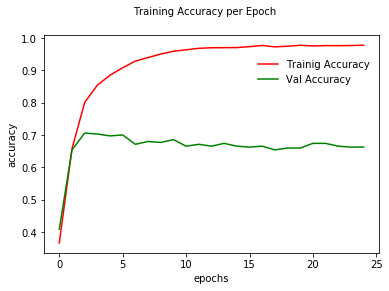

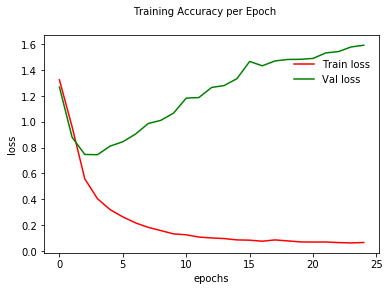

In [26]:
#Answer here
#Answer here
#Answer here
#Answer here

#Traiing Accuracy per epoch
import matplotlib.pyplot as plt
x =  training_log['epoch']
y1 = training_log['accuracy']
y2 = training_log['val_accuracy']
fig, ax = plt.subplots(1, figsize=(6, 4))
fig.suptitle('Training Accuracy per Epoch ', fontsize=10)
ax.plot(x, y1, color="red", label="Trainig Accuracy")
ax.plot(x, y2, color="green", label="Val Accuracy")
ax.set_xlabel("epochs")
ax.set_ylabel("accuracy")
ax.legend(loc="upper right", title=" ", frameon=False)
plt.show()

#Traiing loss per epoch
x =  training_log['epoch']
y1 = training_log['loss']
y2 = training_log['val_loss']
fig, ax = plt.subplots(1, figsize=(6, 4))
fig.suptitle('Training Accuracy per Epoch ', fontsize=10)
ax.plot(x, y1, color="red", label="Train loss")
ax.plot(x, y2, color="green", label="Val loss")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.legend(loc="upper right", title=" ", frameon=False)
plt.show()

In [27]:
'''
Over/underfitting is not only when test error increases with iterations.
We say that there is over/underfitting when the performance on test set is much lower/higher than the performance on train set
(because the model fits too much to seen data, and do not generalize well).

It's almost always the case that a model performs better on the training set than on test set,
since the model has already seen the data. However, a good model should be able to generalize well on unseen data, 
and then to reduce the gap between performances on train and test sets.

the example of overfitting can be solved by early stopping for example. (Keras)
'''

"\nOver/underfitting is not only when test error increases with iterations.\nWe say that there is over/underfitting when the performance on test set is much lower/higher than the performance on train set\n(because the model fits too much to seen data, and do not generalize well).\n\nIt's almost always the case that a model performs better on the training set than on test set,\nsince the model has already seen the data. However, a good model should be able to generalize well on unseen data, \nand then to reduce the gap between performances on train and test sets.\n\nthe example of overfitting can be solved by early stopping for example. (Keras)\n"

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [28]:
# Answer here
'''
Skip-Gram model:
Skip-Gram Model (SGM) is a model as a vectors and learns to get similar words in context near to one another.
Skip-gram is one of the unsupervised learning techniques used to find the most related words for a given word. 
It is used to predict the context word for given target words. with this technic, we could predict the incompleted 
sentences and train the model, so that it would increase the prediction accuracy to the test model.
'''

'\nSkip-Gram model:\nSkip-Gram Model (SGM) is a model as a vectors and learns to get similar words in context near to one another.\nSkip-gram is one of the unsupervised learning techniques used to find the most related words for a given word. \nIt is used to predict the context word for given target words. with this technic, we could predict the incompleted \nsentences and train the model, so that it would increase the prediction accuracy to the test model.\n'

load ok
load ok
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


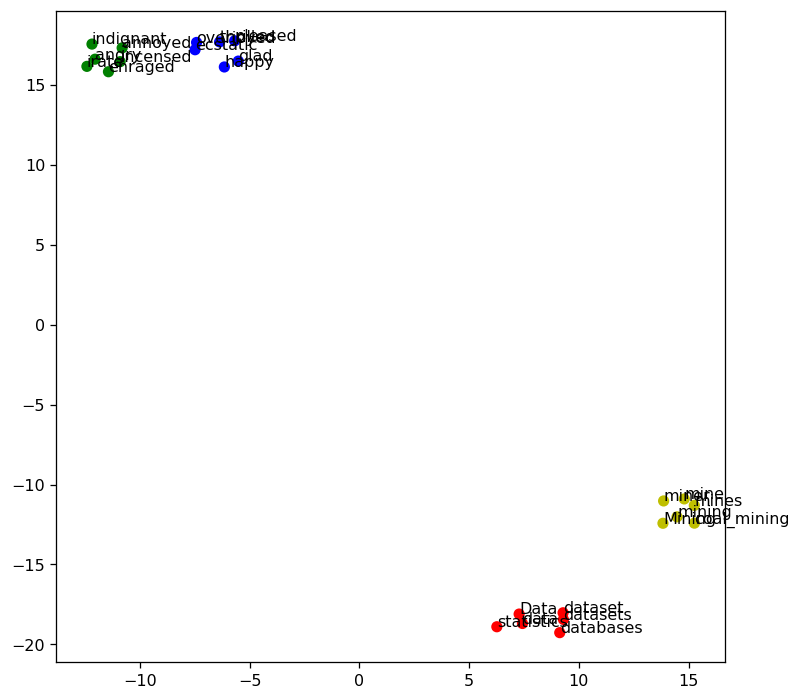

In [31]:
###Please ignore this cell
###Please ignore this cell
###Please ignore this cell

## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model #wordvec은 문장 자체가 필요하다.
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

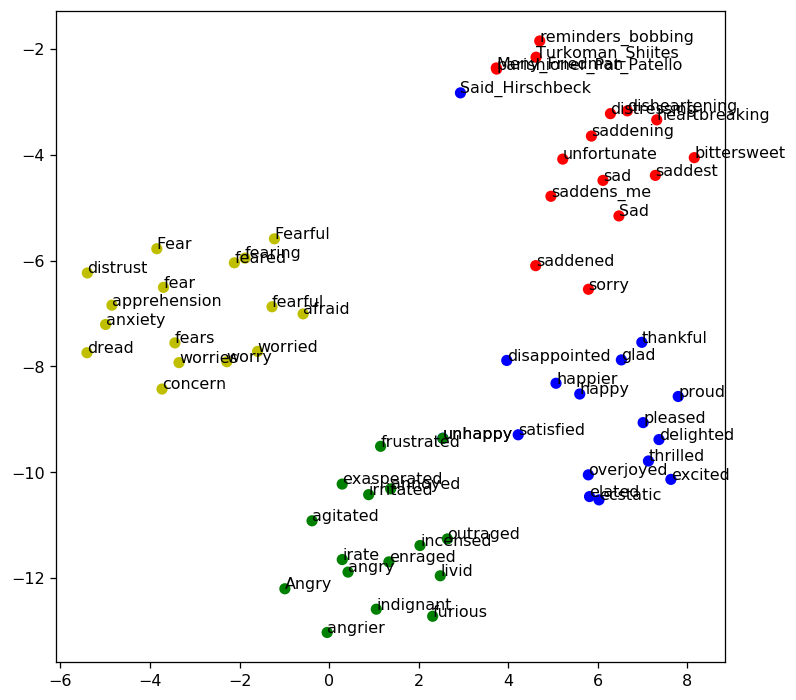

In [32]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

#print('happy_words: ', happy_words)
#print('angry_words: ', angry_words)
#print('sad_words: ', sad_words)
#print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
#print('\ntarget words: ')
#print(target_words)

#print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
#print(color)


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


model = w2v_google_model


size = 60
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

tsne = TSNE(n_components=2, metric='cosine', random_state=28)

X_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()